In [67]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import matplotlib.cm as cm


In [ ]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

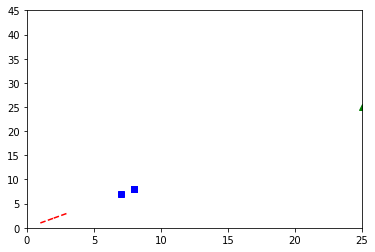

In [21]:
dataA = np.array([[1, 2], [2, 2], [8, 8], [25, 80], [2, 3], [8, 7]])
# evenly sampled time at 200ms intervals
d1 = np.array([[1, 2, 2], [2, 2, 3]])
d2 = np.array([[8, 8], [8, 7]])
d3 = np.array([[25], [40]])

# red dashes, blue squares and green triangles
plt.plot(d1, d1, 'r--', d2, d2, 'bs', d3, d3, 'g^')
plt.axis([0, 25, 0, 45])
plt.show()

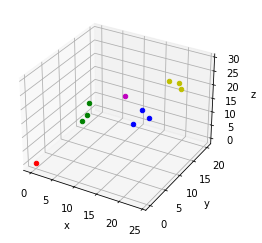

In [92]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
xdata = 22, 23, 24, 3, 4, 5, 20, 18, 19, 0, 10
ydata = 0, 1, 2, 13, 11, 8, 19, 18, 20, 0, 15
zdata = 25, 29, 26, 11, 9, 10, 18, 21, 19, 0, 15
colors = itertools.cycle(["b", "b", "b", "g", "g", "g", "y", "y", "y", "r", "m"])
for i in range(0, len(zdata)):
    ax.scatter3D(xdata[i], ydata[i], zdata[i], color=next(colors));
#plot_points = ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='rainbow');
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.savefig('plots/test_data_1_plot.pdf')